# 1. Observations on 1 pixel kernel

# 2. BMENet with maxpool

In [2]:
import os, sys
print(os.getcwd())
sys.path.append("./../DLStudio-2.5.1")

from DLStudio import *

/home/chen4126/ece60146/HW6


In [2]:
class BMEnetModifiedForMaxpool(BMEnet):
    def __init__(self, dl_studio, skip_connections=True, depth=8, use_maxpool=False):
        super().__init__(dl_studio, skip_connections, depth, use_maxpool)

    class SkipBlock(nn.Module):
            """
            Class Path:   DLStudio  ->  BMEnet  ->  SkipBlock
            """            
        def __init__(self, in_ch, out_ch, downsample=False, use_maxpool=False, skip_connections=True):
            super().__init__()
            self.downsample = downsample
            self.use_maxpool = use_maxpool
            self.skip_connections = skip_connections
            self.in_ch = in_ch
            self.out_ch = out_ch
            self.convo1 = nn.Conv2d(in_ch, in_ch, 3, stride=1, padding=1)
            self.convo2 = nn.Conv2d(in_ch, out_ch, 3, stride=1, padding=1)
            self.bn1 = nn.BatchNorm2d(in_ch)
            self.bn2 = nn.BatchNorm2d(out_ch)
            self.in2out = nn.Conv2d(in_ch, out_ch, 1)

            if downsample:
                if use_maxpool:
                    self.downsampler = nn.MaxPool2d(2, 2)  # Single max pooling layer
                else:
                    self.downsampler1 = nn.Conv2d(in_ch, in_ch, 1, stride=2)
                    self.downsampler2 = nn.Conv2d(out_ch, out_ch, 1, stride=2)

                    
            def forward(self, x):
                identity = x                                     
                out = self.convo1(x)                              
                out = self.bn1(out)                              
                out = nn.functional.relu(out)
                out = self.convo2(out)                              
                out = self.bn2(out)                              
                out = nn.functional.relu(out)
                if self.downsample:
                    identity = self.downsampler1(identity)
                    out = self.downsampler2(out)
                if self.skip_connections:
                    if (self.in_ch == self.out_ch) and (self.downsample is False):
                        out = out + identity
                    elif (self.in_ch != self.out_ch) and (self.downsample is False):
                        identity = self.in2out( identity )     
                        out = out + identity
                    elif (self.in_ch != self.out_ch) and (self.downsample is True):
                        out = out + torch.cat((identity, identity), dim=1)
                return out

    



current_dir = /home/chen4126/ece60146/HW6


### 2.1 Train loss curve

### 2.2 Confusion Matrix

# 3. BMENet with stride

ter=3000  elapsed_time=   93 secs]   Loss: 1.641


[epoch:1/6  iter=4000  elapsed_time=  122 secs]   Ground Truth:          horse      plane       ship        dog
[epoch:1/6  iter=4000  elapsed_time=  122 secs]   Predicted Labels:       ship      plane       ship       frog
[epoch:1/6  iter=4000  elapsed_time=  122 secs]   Loss: 1.556


[epoch:1/6  iter=5000  elapsed_time=  151 secs]   Ground Truth:          plane       bird      plane        car
[epoch:1/6  iter=5000  elapsed_time=  151 secs]   Predicted Labels:      plane       frog        dog        car
[epoch:1/6  iter=5000  elapsed_time=  151 secs]   Loss: 1.478


[epoch:1/6  iter=6000  elapsed_time=  181 secs]   Ground Truth:          plane       ship       deer        cat
[epoch:1/6  iter=6000  elapsed_time=  181 secs]   Predicted Labels:       bird       ship        dog        cat
[epoch:1/6  iter=6000  elapsed_time=  181 secs]   Loss: 1.384


[epoch:1/6  iter=7000  elapsed_time=  210 secs]   Ground Truth:           ship      h

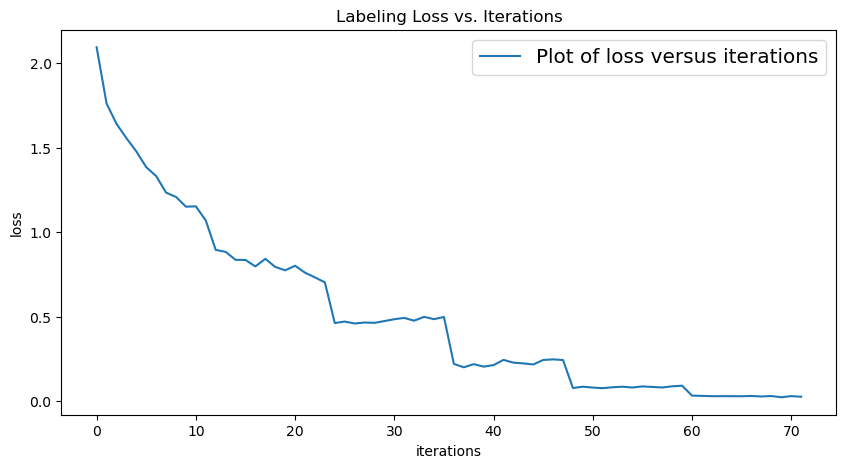

/home/chen4126/ece60146/HW6/./../DLStudio-2.5.1/DLStudio/DLStudio.py:2964: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(self.path_saved_model

In [3]:
dls = DLStudio(
#                  dataroot = "/home/kak/ImageDatasets/CIFAR-10/",
                dataroot = "./../data/CIFAR-10/",
                image_size = [32,32],
                path_saved_model = "./saved_model",
                momentum = 0.9,
                learning_rate = 1e-4,
                epochs = 6,
                batch_size = 4,
                classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck'),
                use_gpu = True,
            )

bme_net = dls.BMEnet(dls, skip_connections=True, depth=8)         ## if you want to use skips

bme_net.load_cifar_10_dataset()

## display network properties
number_of_learnable_params = sum(p.numel() for p in bme_net.parameters() if p.requires_grad)
print("\n\nThe number of learnable parameters in the model: %d" % number_of_learnable_params)

## training and testing
bme_net.run_code_for_training(bme_net, display_images=False)
bme_net.run_code_for_testing(bme_net, display_images=False)


### 3.1 Train loss curve

### 3.2 Confusion Matrix

# 4. Table1: Overall accuracy of 2 models table

# 5. Table2: Per class accuracy of 2 models (10x2 table)

# 6. Observations of Maxpool vs Stride

# 7. Skip Connections with MSCOCO

### 7.1 5x3 images

### 7.2 train loss curve

### 7.3 conf matrix 5x5

### 7.4 overall accuracy

### 7.5 per class accuracy 5x1 table

### 7.6 observations